In [8]:
import requests
from glob import glob
import rasterio as rio
import matplotlib.pyplot as plt
import io 
from PIL import Image
import numpy as np 

In [2]:
url = 'http://localhost:8001/'
endpoint = 'RoadSegmentationQ2'

res = requests.get(url)
res.status_code, res.json()

(200, {'message': 'Hello from the models API!'})

In [3]:
samples = glob('samples/*')
samples

['samples/deep_globe.jpg',
 'samples/S2L2A_2023-06-17.tif',
 'samples/sentinel-2-l2a_2024-05-09.tif',
 'samples/sentinel-2-l2a_2024-05-09_rgb.tif']

In [4]:
sample = 'samples/deep_globe.jpg'

with rio.open(sample) as src:
    image = src.read()
    
image.shape

/Users/juan/Desktop/scaneo/.venv/lib/python3.12/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(3, 1024, 1024)

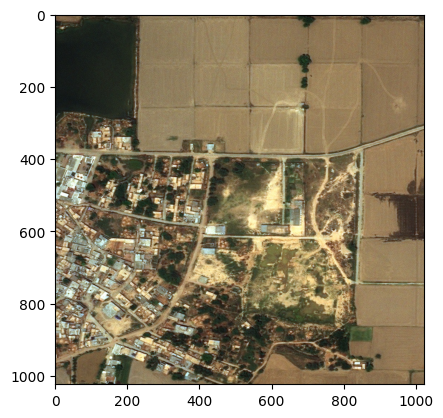

In [5]:
# plt.imshow(image[(3,2,1),...].transpose(1, 2, 0) / 3000)
plt.imshow(image.transpose(1, 2, 0))

In [7]:
res = requests.post(
	url + endpoint, 
	files={'image': open(sample, 'rb')}
)

res.status_code

200

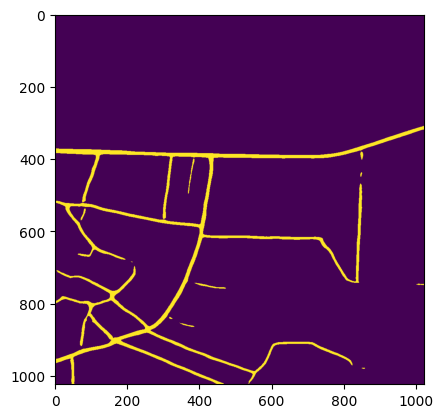

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

image_bytes = io.BytesIO(res.content)
img = Image.open(image_bytes)

logits = np.array(img) 
probas = sigmoid(logits)
mask = probas > 0.5 # use different thresholds for sensitivity analysis

plt.imshow(mask)
plt.show()